Run this notebook in SageMaker p2.xlarge notebook instance with environment conda_pytorch_p36

This notebook was developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Initial Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [ ]:
!pip install tensorboard

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
#!pip install -r yolov5/requirements.txt  # install dependencies
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 876 (delta 21), reused 25 (delta 12), pack-reused 835
Receiving objects: 100% (876/876), 3.41 MiB | 40.63 MiB/s, done.
Resolving deltas: 100% (572/572), done.
/home/ec2-user/SageMaker/myAWSStudyBlog/yolo/6-Yolo-v5/yolov5


In [2]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.5.1 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)


# Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    504      0 --:--:-- --:--:-- --:--:--   503
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 14.4M    0 14.4M    0     0  9776k      0 --:--:--  0:00:01 --:--:-- 78.9M
image 1/2 inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.018s)
image 2/2 inference/images/zidane.jpg: 288x416 2 persons, 1 ties, Done. (0.019s)
Results saved to /home/ec2-user/S

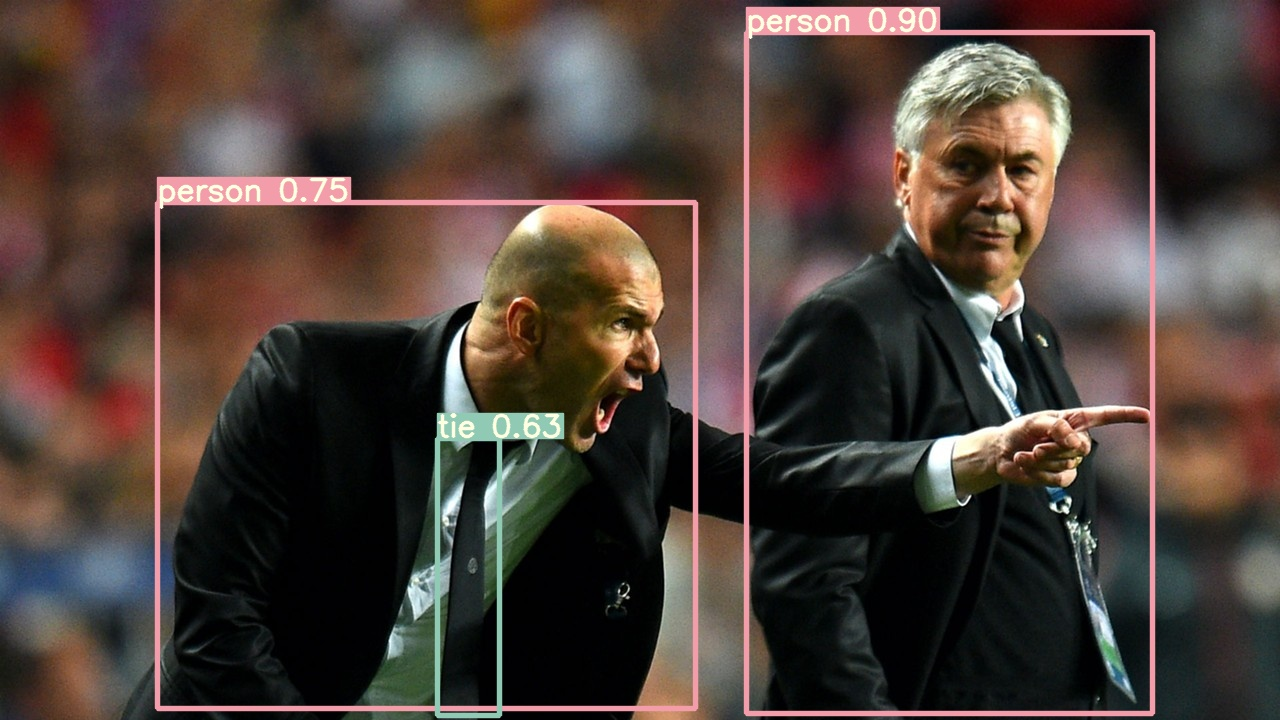

In [3]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source ./inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

In [0]:
# Example syntax (do not run cell)
!python detect.py --source ./file.jpg  # image 
                           ./file.mp4  # video
                           ./dir  # directory
                           0  # webcam
                           'rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa' # rtsp
                           'http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8'  # http

#2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available. To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [4]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [5]:
# Run YOLOv5s on COCO val2017
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --img 640

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='val', verbose=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Model Summary: 191 layers, 7.46816e+06 parameters, 7.46816e+06 gradients
Fusing layers...
Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
Caching labels ../coco/val2017.txt (4952 found, 48 missing, 0 empty, 0 duplicate
Saving labels to ../coco/labels/val2017.npy for faster future loading
               Class      Images     Targets           P           R      mAP@.5
                 all       5e+03    3.63e+04       0.346       0.643       0.546       0.348
Speed: 1.1/1.8/2.9 ms inference/NMS/total per 640x640 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017_yolov5s_results.json...
loading annotations into memory...
Done (t

In [10]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data ./data/coco.yaml --img 640

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='././data/coco.yaml', device='', img_size=640, iou_thres=0.65, save_json=True, single_cls=False, task='val', verbose=False, weights='yolov5x.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 381 layers, 9.59219e+07 parameters, 9.59219e+07 gradients
Caching labels ../coco/labels/val2017.npy (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100% 5000/5000 [00:00<00:00, 16516.13it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [05:05<00:00,  1.95s/it]
                 all       5e+03    3.63e+04       0.393       0.742       0.652       0.455
Speed: 51.1/2.2/53.3 ms inference/NMS/total per 640x640 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017_yolov5x_results.json...
loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
Loading and preparin

###2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [0]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [0]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test

## 3. Train

Download the 128-image tutorial training dataset `./data/coco128.yaml`, start tensorboard and train a `yolov5s.yaml` model for **5 epochs**. Note that actual training is typically much longer, around **300-1000 epochs**, depending on your dataset.

In [6]:
# Download tutorial dataset coco128.yaml
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # tutorial dataset
!mv ./coco128 ../  # move folder alongside /yolov5

In [ ]:
# # Start tensorboard
# %load_ext tensorboard
# %tensorboard --logdir runs

Train a YOLOv5s model on the coco128 dataset by specifying model configuration file `--cfg ./models/yolo5s.yaml`, and a dataset configuration file `--data ./data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from scratch (randomly initialized weights) using `--weights ''`. Pretrained checkpoints are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.


In [8]:
# Train YOLOv5s on coco128 for 5 epochs
!python train.py --img 640 --batch 16 --epochs 5 --data ./data/coco128.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name tutorial --nosave --cache

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=5, evolve=False, img_size=[640], multi_scale=False, name='tutorial', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n    params  module                                  arguments                     
  0             -1  1      3

## 4. Visualize

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects. Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

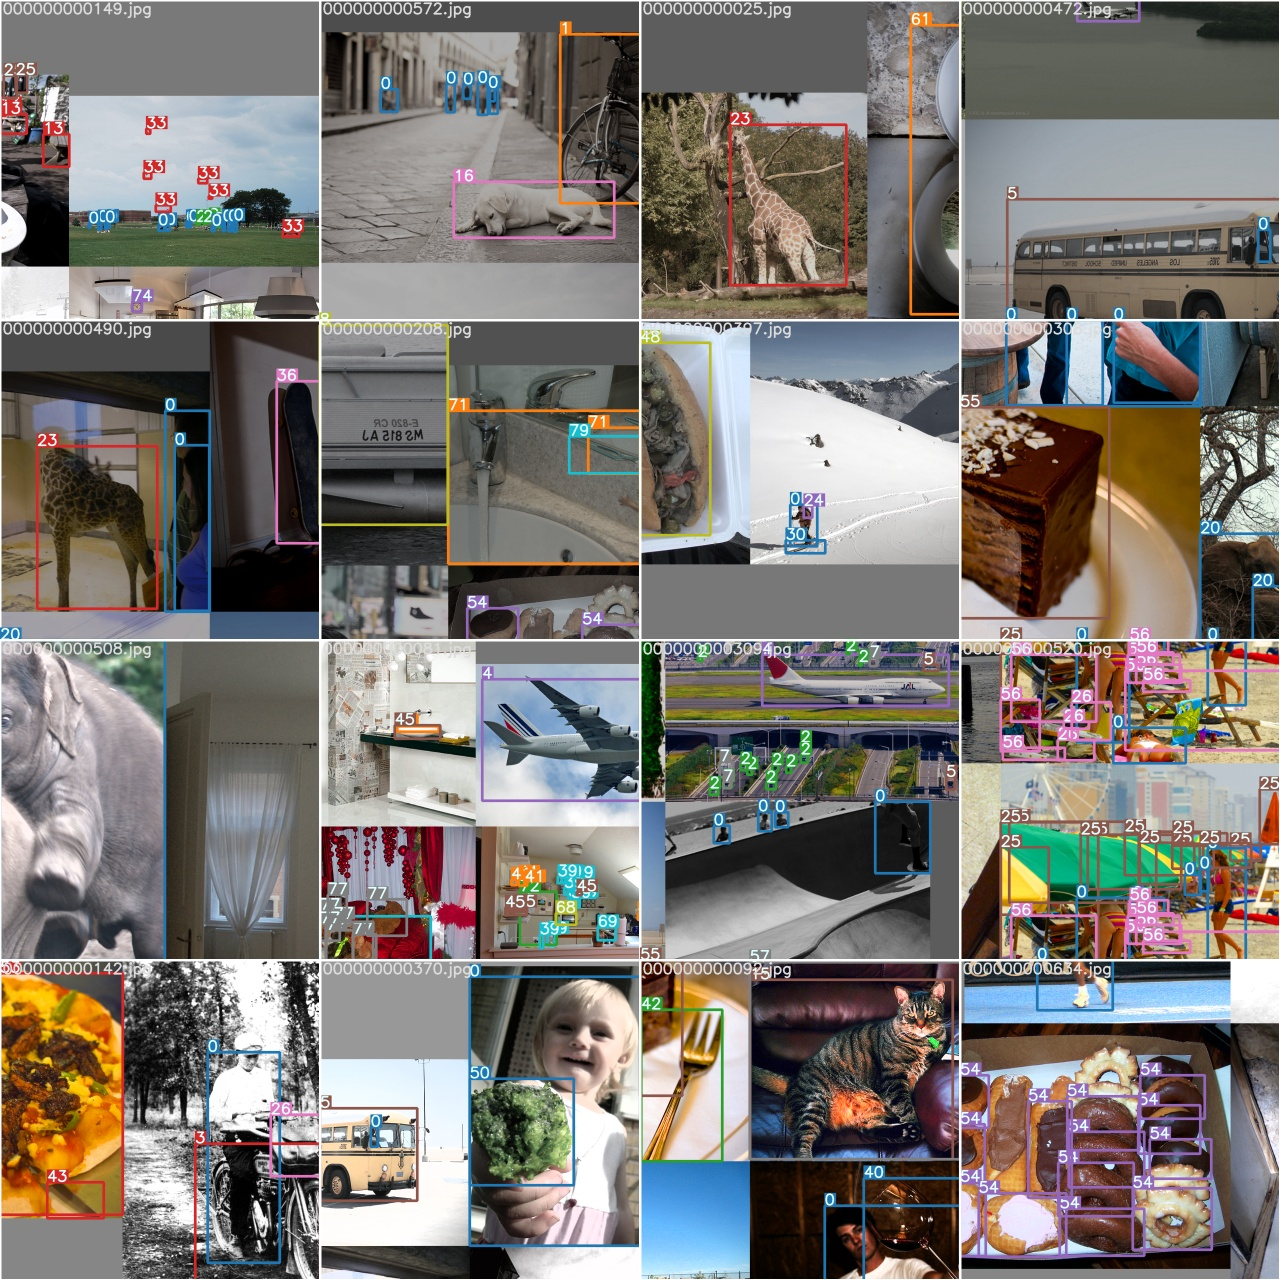

In [9]:
Image(filename='./train_batch1.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 ground truth labels.

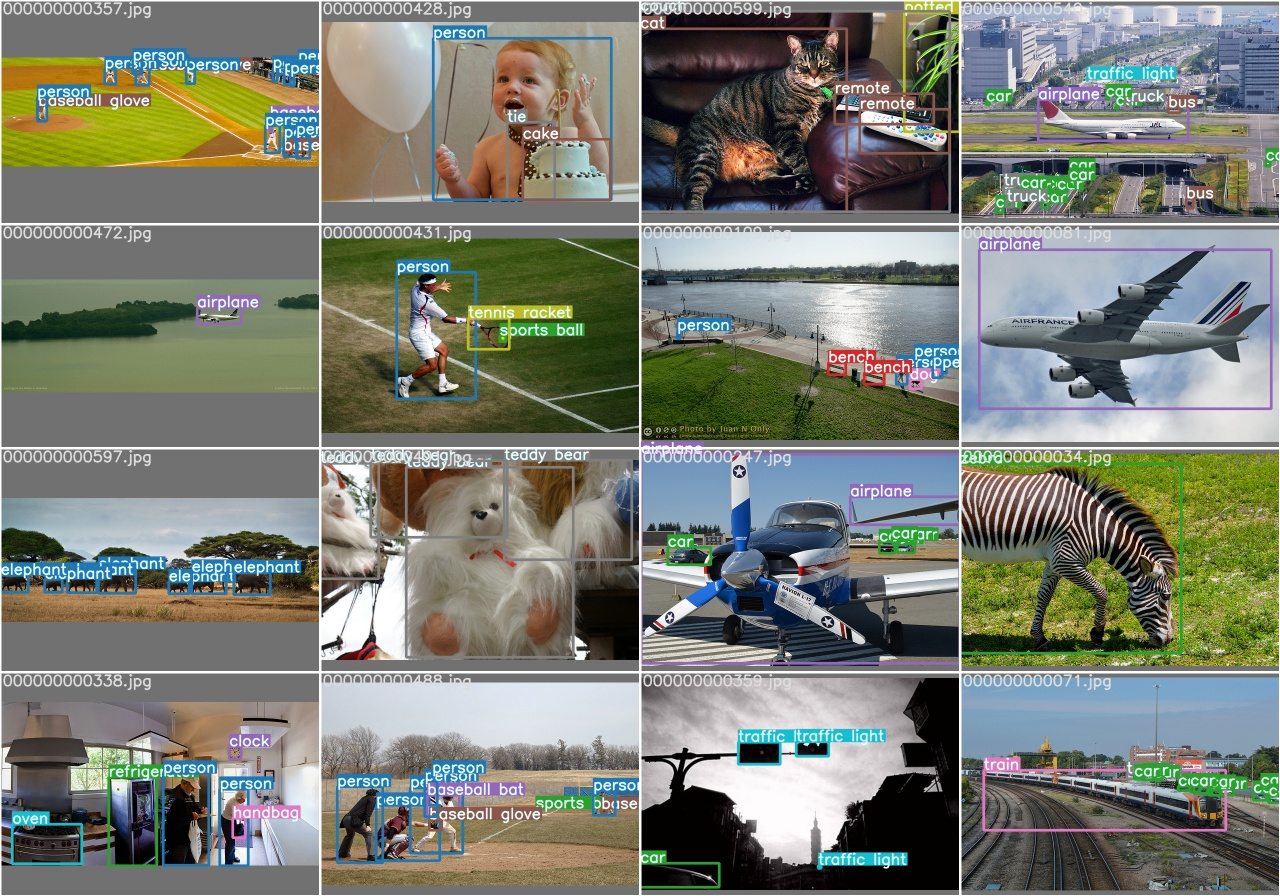

In [10]:
Image(filename='./test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 predictions.

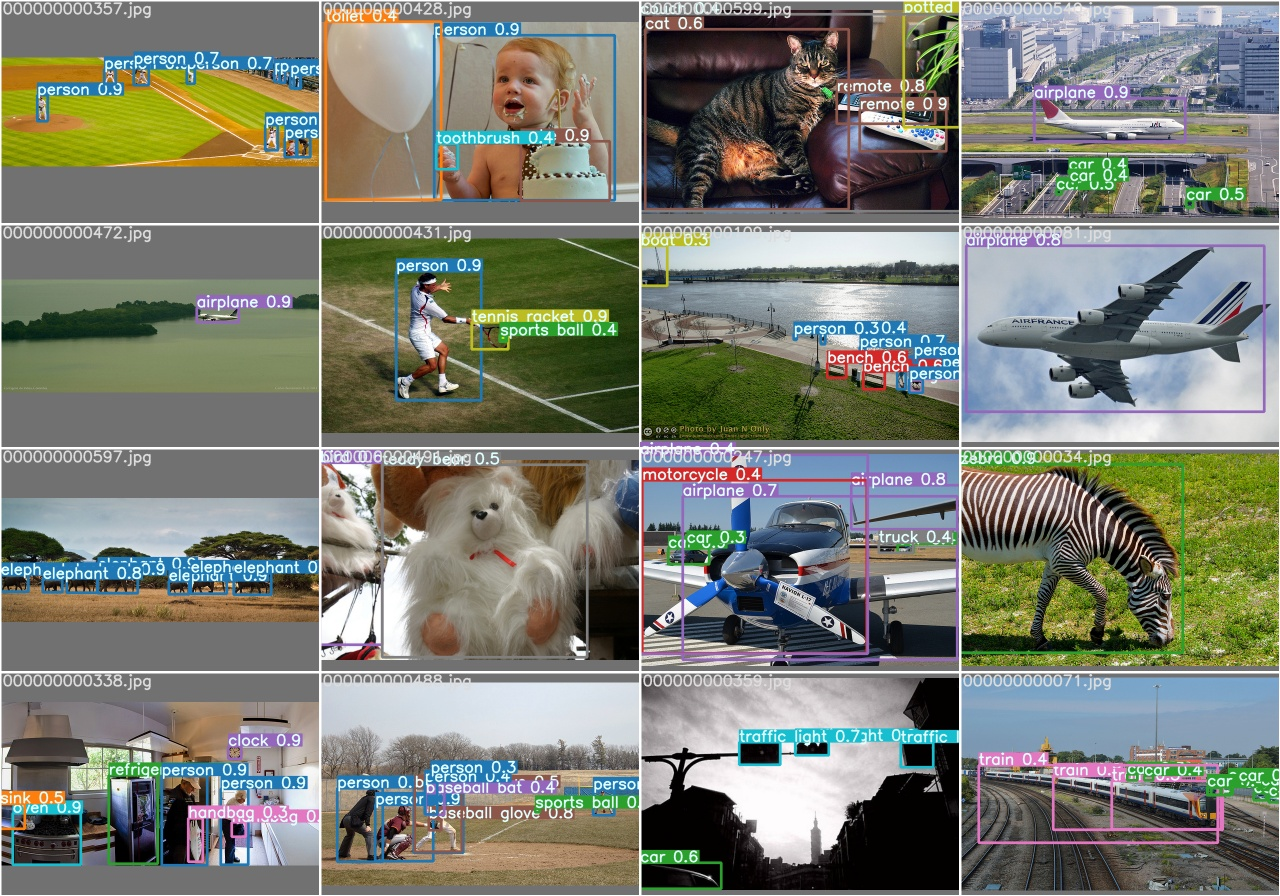

In [11]:
Image(filename='./test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 100 epochs, starting from scratch (orange), and starting from pretrained `yolov5s.pt` weights (blue).

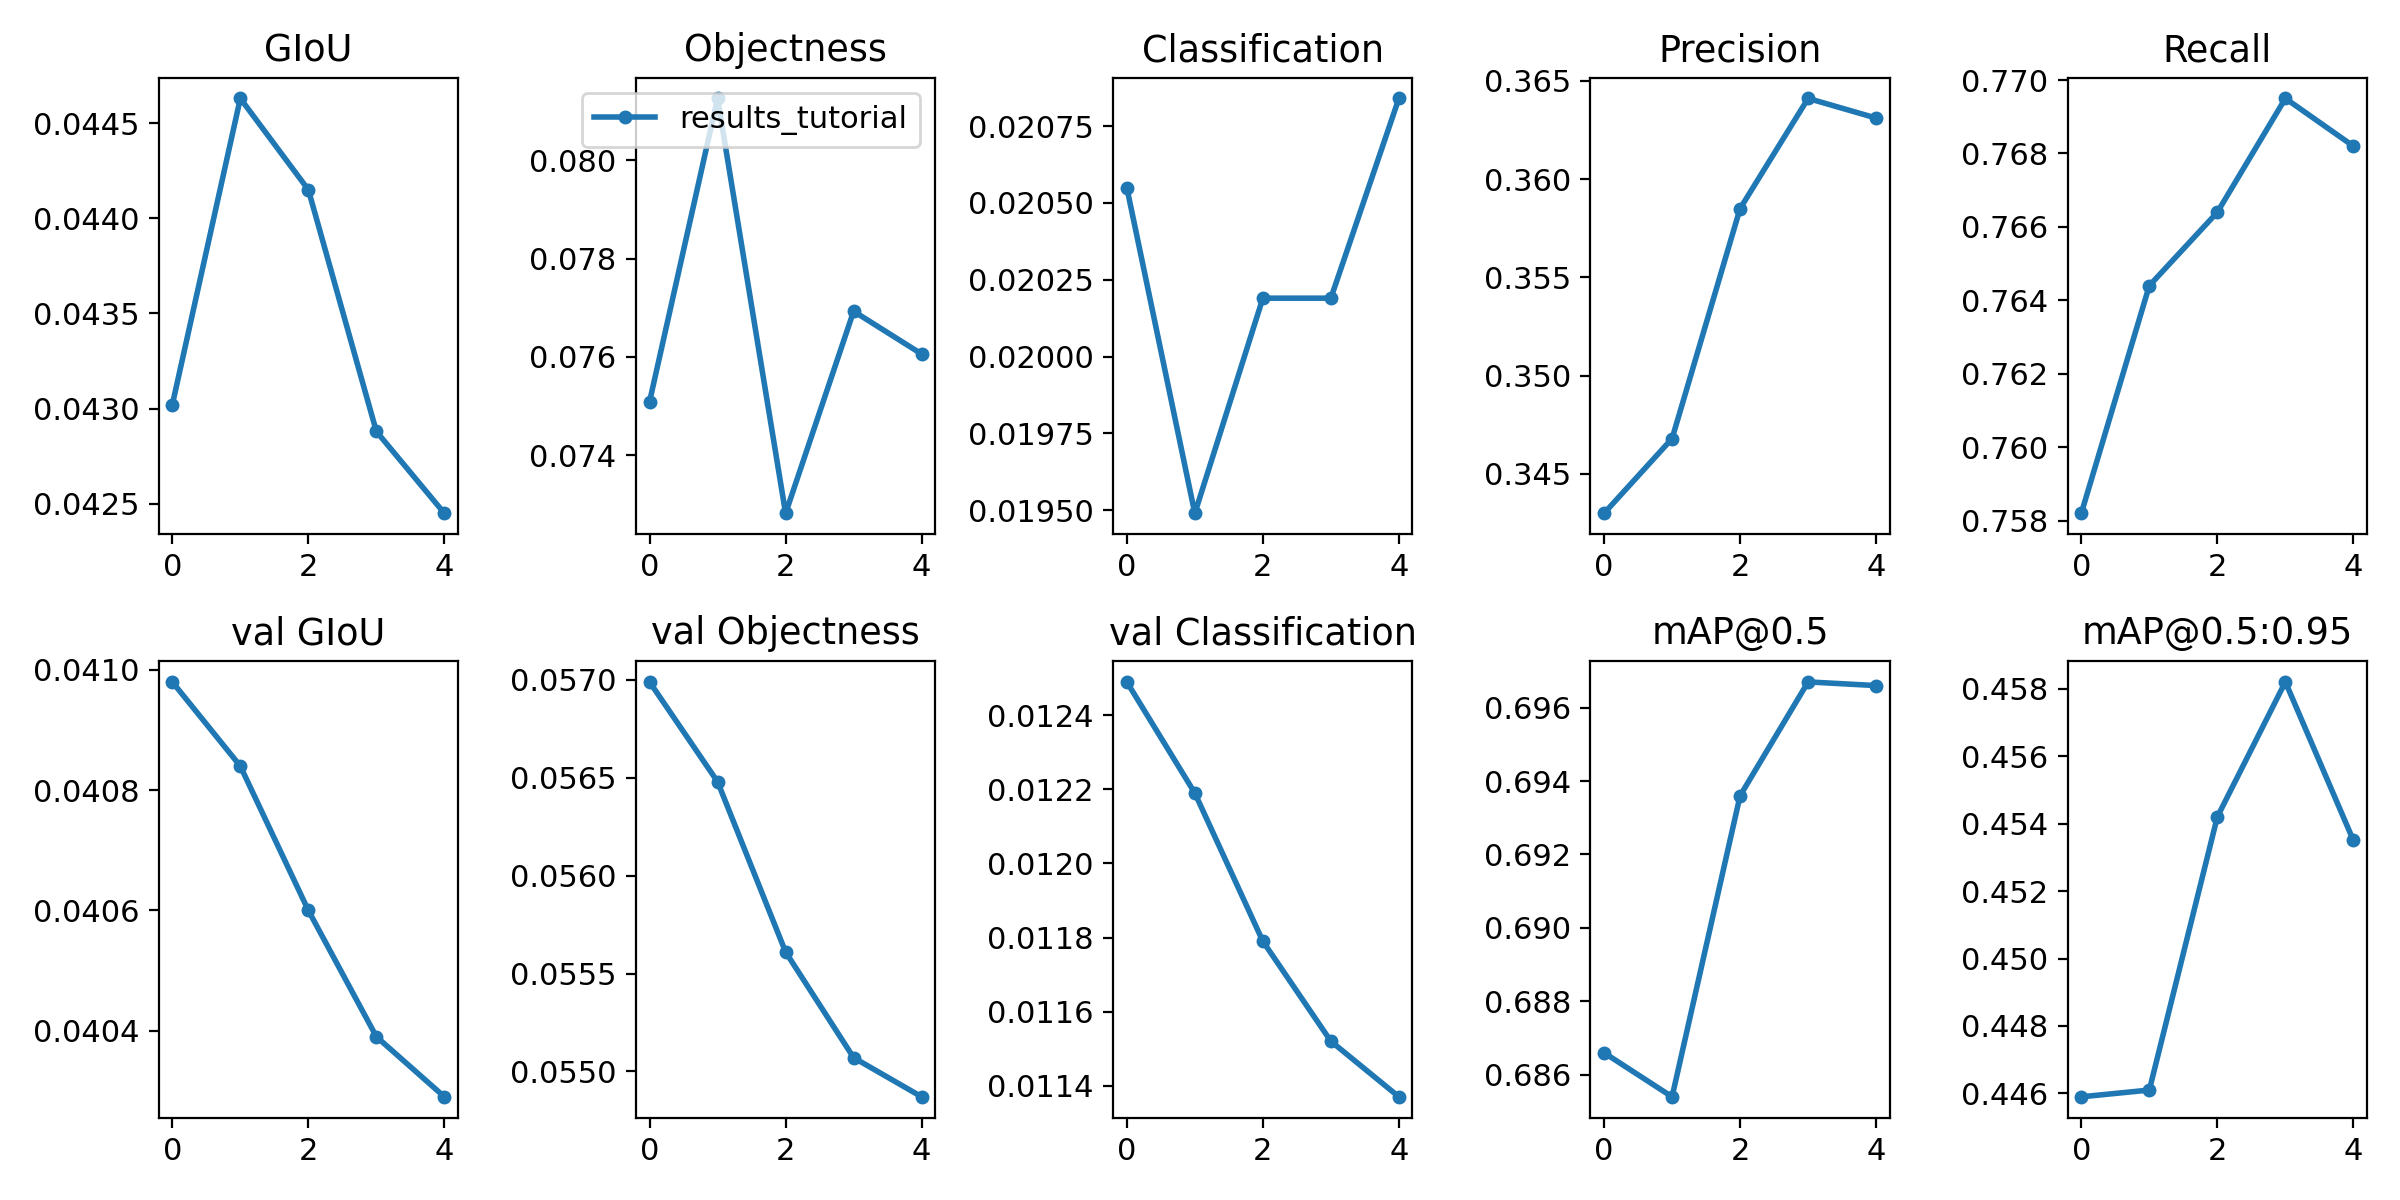

In [12]:
from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='./results.png', width=1000)  # view results.png

## 5. Appendix

In [0]:
# Re-clone
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [0]:
# Apex install
git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [0]:
# Test GCP checkpoint on COCO val2017
%%shell
x=best*.pt
gsutil cp gs://*/*/weights/$x .
python test.py --weights $x --data ./data/coco.yaml --img 736

In [0]:
# Test multiple models on COCO val2017
%%shell
for x in yolov5s yolov5m yolov5l yolov5x
do 
  python test.py --weights $x.pt --data ./data/coco.yaml --img 640 --conf 0.001
done